In [19]:
# Run some setup code for this notebook.

import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [20]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [22]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df.dropna(inplace=True)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Encode 

In [24]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################
df = pd.get_dummies(df, drop_first=True)
df.head()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


## Data process

In [55]:

################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################
import numpy as np
y = df["Loan_Status_Y"].values
X = df.drop("Loan_Status_Y", axis=1).values
X = X/X.max(axis=0)
train_size = int(y.size*0.8)
X_train = X[:train_size, :]
X_test = X[train_size:, :]
y_train = y[:train_size]
y_test = y[train_size:]
print('total size: ',y.size)
print('train size: ',train_size)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

total size:  511
train size:  408


## Train

In [63]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################

LR = LogisticRegression("l2", 1)
dr = LR.fit(X_train, y_train, 0.005, 1e-7, 1e3)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Reach max_iter


## Test

accuracy:
0.8252427184466019


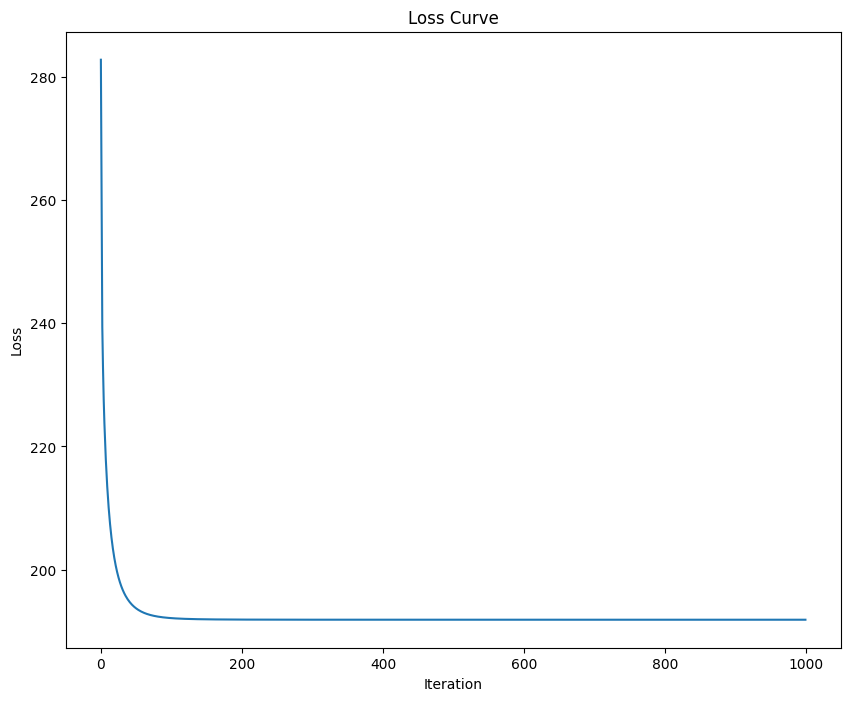

In [64]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################
y_p = LR.predict(X_test)
acc = 1 - np.sum(np.abs(y_p - y_test))/y_p.size
plt.plot(dr)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
print("accuracy:")
print(acc)


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [65]:
lrs = [1e-3,5e-3,1e-2,2e-2]
max_iters = [5e2,1e3,2e3]
gammas = [0, 0.5,1,1.5]
penalties = ["l1", "l2"]

Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter


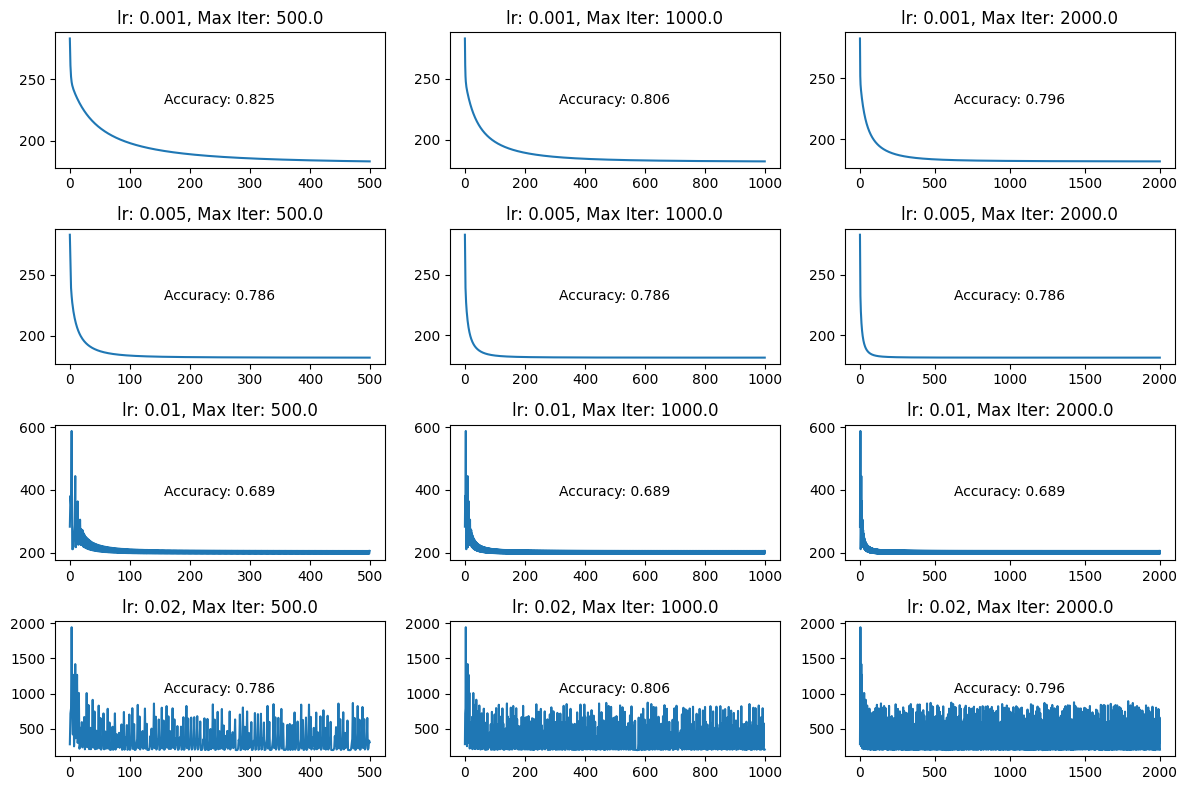

In [66]:
fig, axes = plt.subplots(4, 3, figsize=(12, 8))
i = 0
for lr in lrs:
    LR = LogisticRegression("l2", 0)
    for max_iter in max_iters:
        ax = axes[i//3, i%3]
        i = i+1
        dr = LR.fit(X_train, y_train, lr, 1e-7, max_iter)
        y_p = LR.predict(X_test)
        acc = 1 - np.sum(np.abs(y_p - y_test))/y_p.size
        formatted_acc = "{:.3f}".format(acc)
        params = {"lr":lr, "max_iter":max_iter}
        ax.plot(dr)
        ax.set_title(f"lr: {params['lr']}, Max Iter: {params['max_iter']}")
        ax.text(0.5, 0.5, f"Accuracy: {formatted_acc}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()


Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter
Reach max_iter


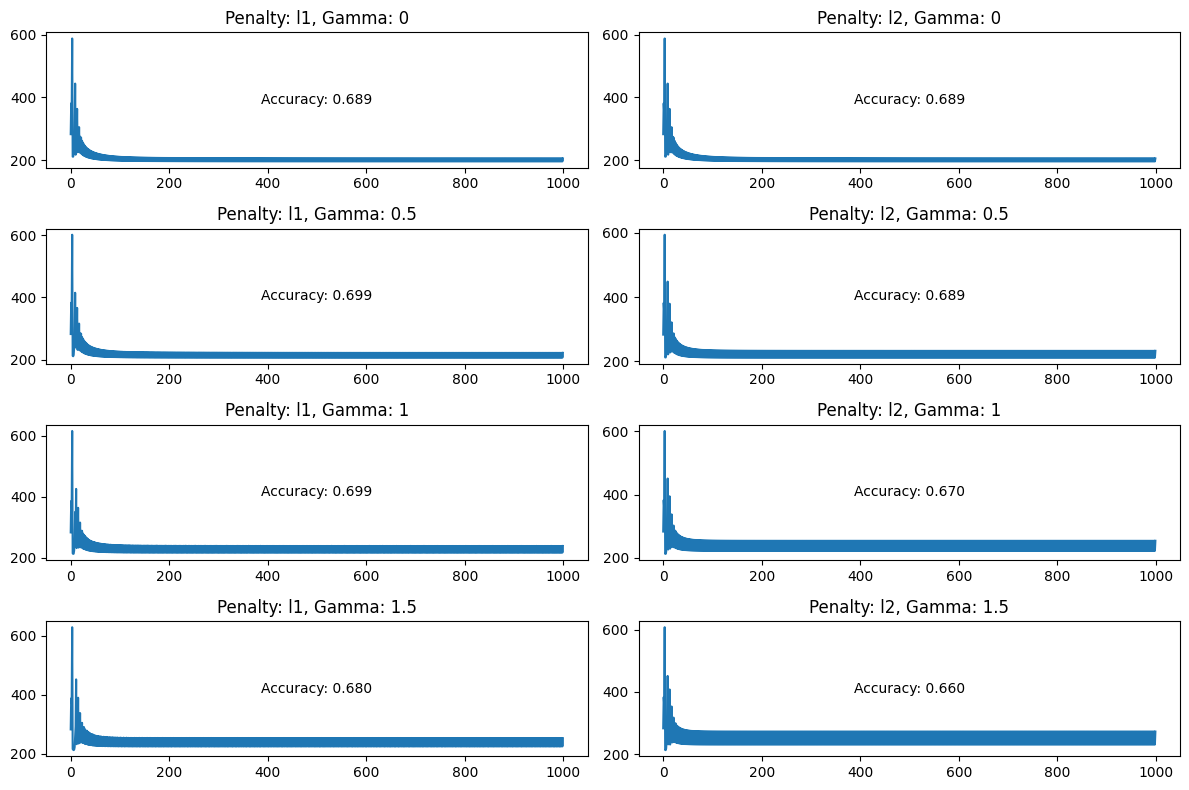

In [72]:
fig, axes = plt.subplots(4, 2, figsize=(12, 8))
i = 0
lr = 0.005
max_iter = 1e3
for gamma in gammas:
    for penalty in penalties:
        LR = LogisticRegression(penalty, gamma)
        ax = axes[i//2, i%2]
        i = i+1
        dr = LR.fit(X_train, y_train, lr, 1e-7, max_iter)
        y_p = LR.predict(X_test)
        acc = 1 - np.sum(np.abs(y_p - y_test))/y_p.size
        formatted_acc = "{:.3f}".format(acc)
        ax.plot(dr)
        ax.set_title(f"Penalty: {penalty}, Gamma: {gamma}")
        ax.text(0.5, 0.5, f"Accuracy: {formatted_acc}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()

Reach max_iter
accuracy: 0.8252427184466019
Reach max_iter
accuracy: 0.7281553398058253
Reach max_iter
accuracy: 0.8446601941747574
Reach max_iter
accuracy: 0.8058252427184466
Reach max_iter
accuracy: 0.8446601941747574
Reach max_iter
accuracy: 0.8155339805825242
Reach max_iter
accuracy: 0.7961165048543689
Reach max_iter
accuracy: 0.8252427184466019
Reach max_iter
accuracy: 0.7961165048543689
Reach max_iter
accuracy: 0.8446601941747574
mean accuracy: 0.8126213592233011


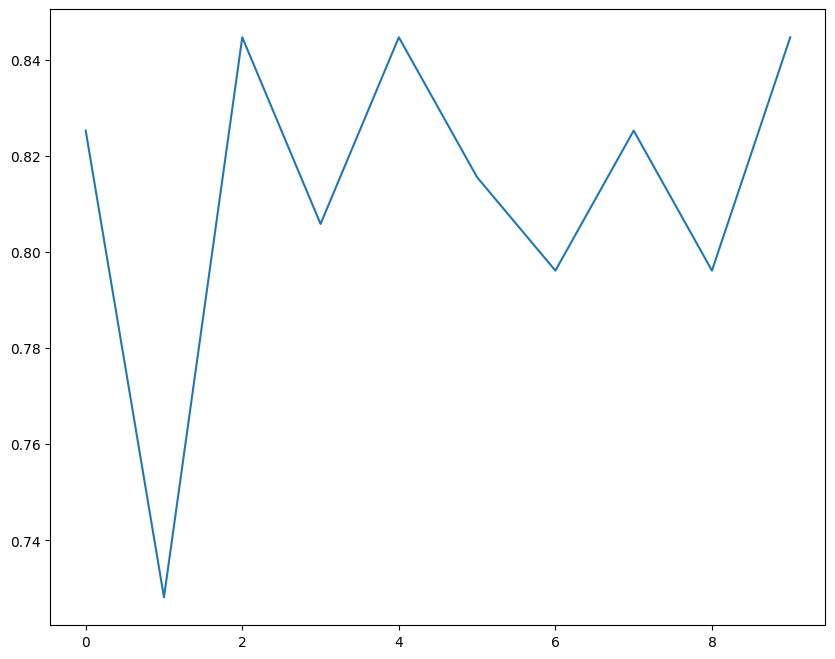

In [81]:
data_y = df["Loan_Status_Y"].values
data_X = df.drop("Loan_Status_Y", axis=1).values
data_X = data_X/data_X.max(axis=0)
acc_list = []
for i in range(10):
    shuffled_idx = np.random.permutation(data_y.size)
    X = data_X[shuffled_idx, :]
    y = data_y[shuffled_idx]
    train_size = int(y.size*0.8)
    X_train = X[:train_size, :]
    X_test = X[train_size:, :]
    y_train = y[:train_size]
    y_test = y[train_size:]
    LR = LogisticRegression("l2", 0.5)
    dr = LR.fit(X_train, y_train, 0.001, 1e-7, 5e3)
    y_p = LR.predict(X_test)
    acc = 1 - np.sum(np.abs(y_p - y_test))/y_p.size
    print("accuracy:", acc)
    acc_list.append(acc)
print("mean accuracy:", np.mean(acc_list))
plt.plot(acc_list)

